0.0


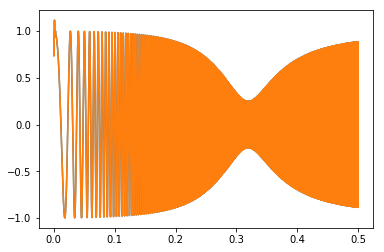

In [1]:
# -*- coding: utf-8 -*-
import scipy.signal as signal
import numpy as np
import pylab as pl

# 某个均衡滤波器的参数
a = np.array([1.0, -1.947463016918843, 0.9555873701383931])
b = np.array([0.9833716591860479, -1.947463016918843, 0.9722157109523452])

# 44.1kHz， 1秒的频率扫描波
t = np.arange(0, 0.5, 1/44100.0)
x= signal.chirp(t, f0=10, t1 = 0.5, f1=1000.0)

# 直接一次计算滤波器的输出
y = signal.lfilter(b, a, x)

# 将输入信号分为50个数据一组
x2 = x.reshape((-1,50))

# 滤波器的初始状态为0， 长度是滤波器系数长度-1
z = np.zeros(max(len(a),len(b))-1, dtype=np.float)
y2 = [] # 保存输出的列表

for tx in x2:
    # 对每段信号进行滤波，并更新滤波器的状态z
    ty, z = signal.lfilter(b, a, tx, zi=z)
    # 将输出添加到输出列表中
    y2.append(ty)
    
# 将输出y2转换为一维数组
y2 = np.array(y2)
y2 = y2.reshape((-1,))

# 输出y和y2之间的误差
print(np.sum((y-y2)**2))

# 绘图
pl.plot(t, y, t, y2)
pl.show()

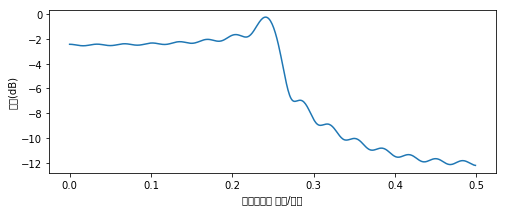

In [7]:
# -*- coding: utf-8 -*-
import scipy.signal as signal
import numpy as np
import pylab as pl

def h_ideal(n, fc):
    return 2*fc*np.sinc(2*fc*np.arange(0, n, 1.0))
#     return 2*fc*np.sinc(2*fc*np.arange(-n, n, 1.0))

b = h_ideal(30, 0.25)

w, h = signal.freqz(b)

pl.figure(figsize=(8,3))
pl.plot(w/2/np.pi, 20*np.log10(np.abs(h)))
pl.xlabel(u"正规化频率 周期/取样")
pl.ylabel(u"幅值(dB)")
pl.show()

In [8]:
len(b)

30